Now it's your turn to test your new knowledge of missing values handling. You'll probably find it makes a big difference.


In this exercise, you will work with data from the Housing Prices from Kaggle.

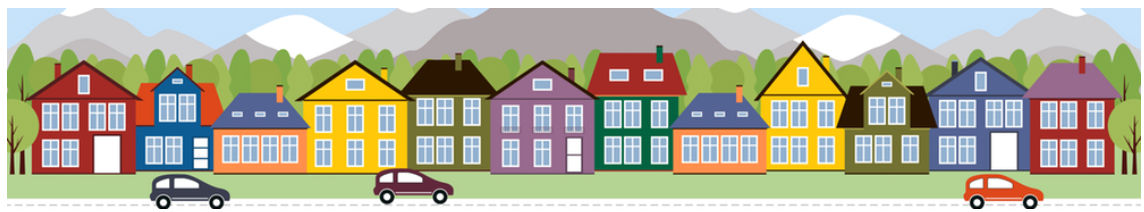Ames Housing dataset image

Run the next code cell without changes to load the training and validation sets in X_train, X_valid, y_train, and y_valid. The test set is loaded in X_test.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('train.csv', index_col='Id')
X_test_full = pd.read_csv('test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll use only numerical predictors
X = X_full.select_dtypes(exclude=['object'])
X_test = X_test_full.select_dtypes(exclude=['object'])

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

Task 1: print the first five rows of the data.

# Step 1: Preliminary investigation
Run the code cell below without changes.

In [ ]:
#Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

In [ ]:
# Fill in the line below: How many rows are in the training data?

# Fill in the line below: How many columns in the training data
# have missing values?


# Fill in the line below: How many missing entries are contained in 
# all of the training data?


# Part B

Considering your answers above, what do you think is likely the best approach to dealing with the missing values?

To compare different approaches to dealing with missing values, you'll use the same score_dataset() function from the tutorial. This function reports the mean absolute error (MAE) from a random forest model.

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

# Step 2: Drop columns with missing values
In this step, you'll preprocess the data in X_train and X_valid to remove columns with missing values. Set the preprocessed DataFrames to reduced_X_train and reduced_X_valid, respectively.

In [12]:
# Fill in the line below: get names of columns with missing values


# Fill in the lines below: drop columns in training and validation data


**Run the next code cell without changes to obtain the MAE for this approach.**

In [13]:
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE (Drop columns with missing values):
17837.82570776256


# Step 3: Imputation

use the next code cell to impute missing values with the mean value along each column. Set the preprocessed DataFrames to imputed_X_train and imputed_X_valid. Make sure that the column names match those in X_train and X_valid.

from sklearn.impute import SimpleImputer




In [14]:
# Fill in the lines below: imputation --- use the following names for your new dataframes imputed_X_train, imputed_X_valid,


# Fill in the lines below: imputation removed column names; put them back

Run the next code cell without changes to obtain the MAE for this approach.

In [16]:
print("MAE (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE (Imputation):
18062.894611872147


# Part B
Compare the MAE from each approach. Does anything surprise you about the results? Why do you think one approach performed better than the other?